In [1]:
!unzip "/content/drive/MyDrive/MiniHackathon/ModelwithPredata/trainLine3.zip"

Streaming output truncated to the last 5000 lines.
  inflating: trainLine3/f836400a-Cordia_New-16px-normal-bold.png  
  inflating: trainLine3/f8365b79-Kunlasatri-16px-italic-normal.png  
  inflating: trainLine3/f836bdf1-FC_Knomphing_Regular-16px-italic-bold.png  
  inflating: trainLine3/f8373e91-TH_Charm_of_AU-18px-italic-normal.png  
  inflating: trainLine3/f837682d-TH_Chakra_Petch-14px-italic-bold.png  
  inflating: trainLine3/f837c1a7-TH_Mali_Grade6-16px-italic-normal.png  
  inflating: trainLine3/f837cb02-TH_Chakra_Petch-16px-normal-bold.png  
  inflating: trainLine3/f83829ec-Angsana_New-14px-italic-normal.png  
  inflating: trainLine3/f838cc33-Cordia_New-24px-normal-normal.png  
  inflating: trainLine3/f83a420c-TH_Sarabun-12px-italic-normal.png  
  inflating: trainLine3/f83a4c9d-fonttintin-14px-normal-bold.png  
  inflating: trainLine3/f83b2d5-DM_Shining_Star_Regular-12px-italic-bold.png  
  inflating: trainLine3/f83b4cb-TH_Mali_Grade6-12px-italic-normal.png  
  inflating: trainLi

In [2]:
import os
from pathlib import Path
from os import listdir
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose

In [3]:
# Path to the data directory
data_dir1 = Path("/content/trainLine3")
# Get list of all the images
images = listdir(data_dir1)
id=[]
text=[]
font=[]
size=[]
italic=[]
bold=[]

for img in images:
  id.append(img.split(".png")[0].split('-')[0])
  font.append(img.split(".png")[0].split('-')[1])
  size.append(img.split(".png")[0].split('-')[2])
  italic.append(img.split(".png")[0].split('-')[3])
  bold.append(img.split(".png")[0].split('-')[4])

print("Number of images found: ", len(id))

Number of images found:  154366


In [4]:
import pandas as pd

In [5]:
data ={'Id':id, 'Font':font,'italic':italic,'bold':bold}

In [6]:
df = pd.DataFrame(data)

In [7]:
import tensorflow as tf
import keras
from keras import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def conv_label(label,label1,label2):
  if label == 'Angsana_New':
      x=0
  elif label == 'Cordia_New':
      x = 4
  elif label == 'DM_Shining_Star_Regular':
      x = 8
  elif label == 'FC_Knomphing_Regular':
      x = 12
  elif label == 'fonttintin':
      x = 16
  elif label == 'Kunlasatri':
      x = 20
  elif label == 'TH_Chakra_Petch':
      x = 24
  elif label == 'TH_Charm_of_AU':
      x = 28
  elif label == 'TH_Mali_Grade6':
      x = 32
  elif label == 'TH_Sarabun':
      x = 36
  
  if label1 == 'normal' and label2 == 'normal':
    return x
  elif label1 == 'normal' and label2 == 'bold':
    return x+1
  elif label1 == 'italic' and label2 == 'normal':
    return x+2
  elif label1 == 'italic' and label2 == 'bold':
    return x+3


In [9]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainLine3/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  data.append(resized)
  label = img.split(".png")[0].split('-')[1]
  label1 = img.split(".png")[0].split('-')[3]
  label2 = img.split(".png")[0].split('-')[4]
  labels.append(conv_label(label,label1,label2))

(array([3743., 3847., 3939., 4179., 3930., 3912., 3530., 3893., 3533.,
        3782., 3958., 4051., 3526., 3723., 4015., 4158., 3764., 4010.,
        4015., 3983., 3587., 3859., 3541., 4063., 3610., 3858., 3898.,
        3995., 3772., 3677., 4028., 3744., 3786., 3992., 3596., 4087.,
        3776., 4018., 4175., 3813.]),
 array([ 0.   ,  0.975,  1.95 ,  2.925,  3.9  ,  4.875,  5.85 ,  6.825,
         7.8  ,  8.775,  9.75 , 10.725, 11.7  , 12.675, 13.65 , 14.625,
        15.6  , 16.575, 17.55 , 18.525, 19.5  , 20.475, 21.45 , 22.425,
        23.4  , 24.375, 25.35 , 26.325, 27.3  , 28.275, 29.25 , 30.225,
        31.2  , 32.175, 33.15 , 34.125, 35.1  , 36.075, 37.05 , 38.025,
        39.   ]),
 <a list of 40 Patch objects>)

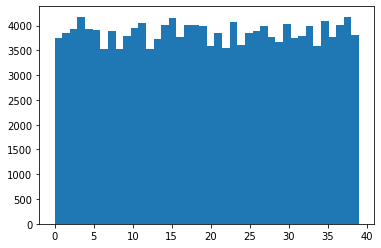

In [10]:
plt.hist(labels,bins=40)

In [11]:
data1=np.array(data)
labels = np.array(labels)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.20, random_state=42,stratify=labels)

In [13]:
X_train = X_train.astype('float32')
X_train/=255
X_train = X_train.reshape(123492, 100, 100,1)

X_test = X_test.astype('float32')
X_test/=255
X_test = X_test.reshape(30874, 100, 100,1)

In [14]:
Y_train= tf.keras.utils.to_categorical(y_train, num_classes=40, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=40, dtype='float32')

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [16]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,weights= 'imagenet',input_shape= (100,100,3))

94781440/94765736 [==============================] - 1s 0us/step


In [17]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [18]:
from tensorflow.keras import layers, Model

In [19]:
x_in = keras.layers.Input(shape=(100, 100, 1))

x = keras.layers.Conv2D(3, 1)(x_in)
x = resnet(x)
# fit output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(40, activation='softmax')(x)
model = Model(x_in, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 3)       6         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 40)                1310760   
                                                                 
Total params: 24,898,478
Trainable params: 24,845,358
Non-trainable params: 53,120
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(X_train, Y_train, batch_size=64 ,epochs=12, validation_data=(X_test,Y_test))

Epoch 1/12
1930/1930 [==============================] - 214s 105ms/step - loss: 2.0703 - categorical_accuracy: 0.4081 - val_loss: 1.2513 - val_categorical_accuracy: 0.5966
Epoch 2/12
1930/1930 [==============================] - 200s 104ms/step - loss: 0.8986 - categorical_accuracy: 0.7045 - val_loss: 0.9244 - val_categorical_accuracy: 0.6930
Epoch 3/12
1930/1930 [==============================] - 200s 104ms/step - loss: 0.5596 - categorical_accuracy: 0.8172 - val_loss: 0.7712 - val_categorical_accuracy: 0.7433
Epoch 4/12
1930/1930 [==============================] - 200s 104ms/step - loss: 0.3809 - categorical_accuracy: 0.8814 - val_loss: 0.7133 - val_categorical_accuracy: 0.7648
Epoch 5/12
1930/1930 [==============================] - 200s 104ms/step - loss: 0.2705 - categorical_accuracy: 0.9219 - val_loss: 0.6619 - val_categorical_accuracy: 0.7824
Epoch 6/12
1930/1930 [==============================] - 200s 104ms/step - loss: 0.2002 - categorical_accuracy: 0.9472 - val_loss: 0.6471 - v

In [ ]:
model.save('/content/drive/MyDrive/MiniHackathon/'+'modeltotal.h5')